<a href="https://colab.research.google.com/github/gplinkage/DataScienceBootCamp/blob/main/Projects/capstoneproject_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is where we will put all our work in order to submit the project. Please place your code under the correct labels so that we can see all the steps below clearly

#Project Summary

####Our project is on ...

#EDA

### EDA on the Machines dataset (PdM_machines)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
machines = pd.read_csv('/content/PdM_machines.csv')

In [ ]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [ ]:
machines.isna().sum()

machineID    0
model        0
age          0
dtype: int64

In [ ]:
machines.describe

<bound method NDFrame.describe of     machineID   model  age
0           1  model3   18
1           2  model4    7
2           3  model3    8
3           4  model3    7
4           5  model3    2
..        ...     ...  ...
95         96  model2   10
96         97  model2   14
97         98  model2   20
98         99  model1   14
99        100  model4    5

[100 rows x 3 columns]>

In [ ]:
machines['model'] = machines['model'].astype('object')

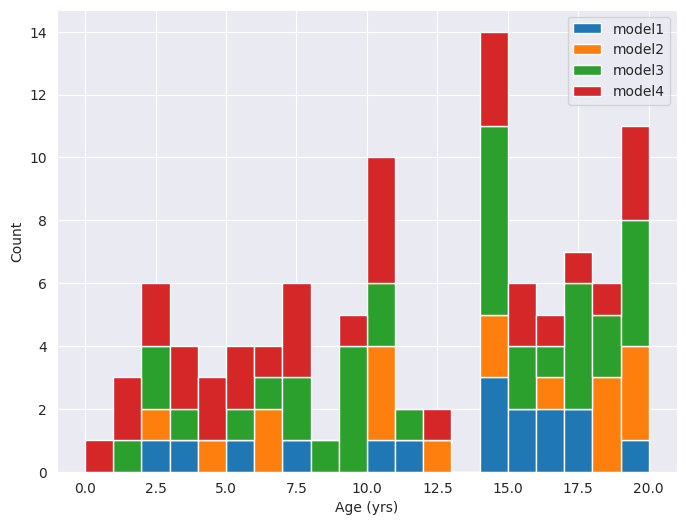

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [ ]:
import plotly.express as px

fig = px.histogram(machines, x='age', color='model', barmode='stack',
                   title='Machine Age Distribution', template='plotly_dark',
                   labels={'age': 'Age', 'model': 'Model'},
                   category_orders={'model': ['model1', 'model2', 'model3', 'model4']})
fig.show()

### EDA on the Telemetry dataset (PdM_telemetry)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
path="/content/PdM_telemetry.csv"

Telemetry= pd.read_csv(path)
Telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [ ]:
Telemetry.isnull().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    1
dtype: int64

In [ ]:
Telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229919 entries, 0 to 229918
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   229919 non-null  object 
 1   machineID  229919 non-null  int64  
 2   volt       229919 non-null  float64
 3   rotate     229919 non-null  float64
 4   pressure   229919 non-null  float64
 5   vibration  229918 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.5+ MB


In [ ]:
#double checking the machine count
Telemetry["machineID"].value_counts()

1     8761
15    8761
26    8761
25    8761
24    8761
23    8761
22    8761
21    8761
20    8761
19    8761
18    8761
17    8761
16    8761
14    8761
2     8761
13    8761
12    8761
11    8761
10    8761
9     8761
8     8761
7     8761
6     8761
5     8761
4     8761
3     8761
27    2133
Name: machineID, dtype: int64

In [ ]:
Telemetry.describe()

,machineID,volt,rotate,pressure,vibration
count,229919.000000,229919.000000,229919.000000,229919.000000,229918.000000
mean,13.625242,170.787160,446.497956,100.867340,40.417797
std,7.576509,15.502204,52.928192,11.061291,5.386301
min,1.000000,97.333604,160.258190,54.914013,19.237552
25%,7.000000,160.328036,411.929636,93.514518,36.790294
50%,14.000000,170.584144,447.515362,100.432540,40.271434
75%,20.000000,181.029302,482.256992,107.515270,43.818071
max,27.000000,250.870453,695.020984,182.111770,76.791072


In [ ]:
Telemetry["datetime"] = pd.to_datetime(Telemetry['datetime'], format='%Y-%m-%d %H:%M:%S')



In [ ]:
#getting the bignning and start date of this data
Telemetry["datetime"].describe()

<ipython-input-19-467de588ed1d>:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                  229919
unique                   8761
top       2015-01-01 06:00:00
freq                       27
first     2015-01-01 06:00:00
last      2016-01-01 06:00:00
Name: datetime, dtype: object

In [ ]:
# I noticed that each day that the machine sensors are being read , it is read 24 times in one day
# the only day that it has not been read 24 times is the start date of 2015-01-01

startdate_data = Telemetry[(Telemetry['machineID'] == 1) & (Telemetry['datetime'].dt.date == pd.to_datetime('2015-01-01').date())]
print(startdate_data)
print(startdate_data.count())

otherday= Telemetry[(Telemetry['machineID'] == 1) & (Telemetry['datetime'].dt.date == pd.to_datetime('2015-01-02').date())]

print(otherday)
print(otherday.count())

              datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3  2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4  2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   
5  2015-01-01 11:00:00          1  172.504839  430.323362   95.927042   
6  2015-01-01 12:00:00          1  156.556031  499.071623  111.755684   
7  2015-01-01 13:00:00          1  172.522781  409.624717  101.001083   
8  2015-01-01 14:00:00          1  175.324524  398.648781  110.624361   
9  2015-01-01 15:00:00          1  169.218423  460.850670  104.848230   
10 2015-01-01 16:00:00          1  167.060981  382.483543  103.780663   
11 2015-01-01 17:00:00          1  160.263954  448.084256   96.480976   
12 2015-01-01 18:00:00          1  153.353492  490.

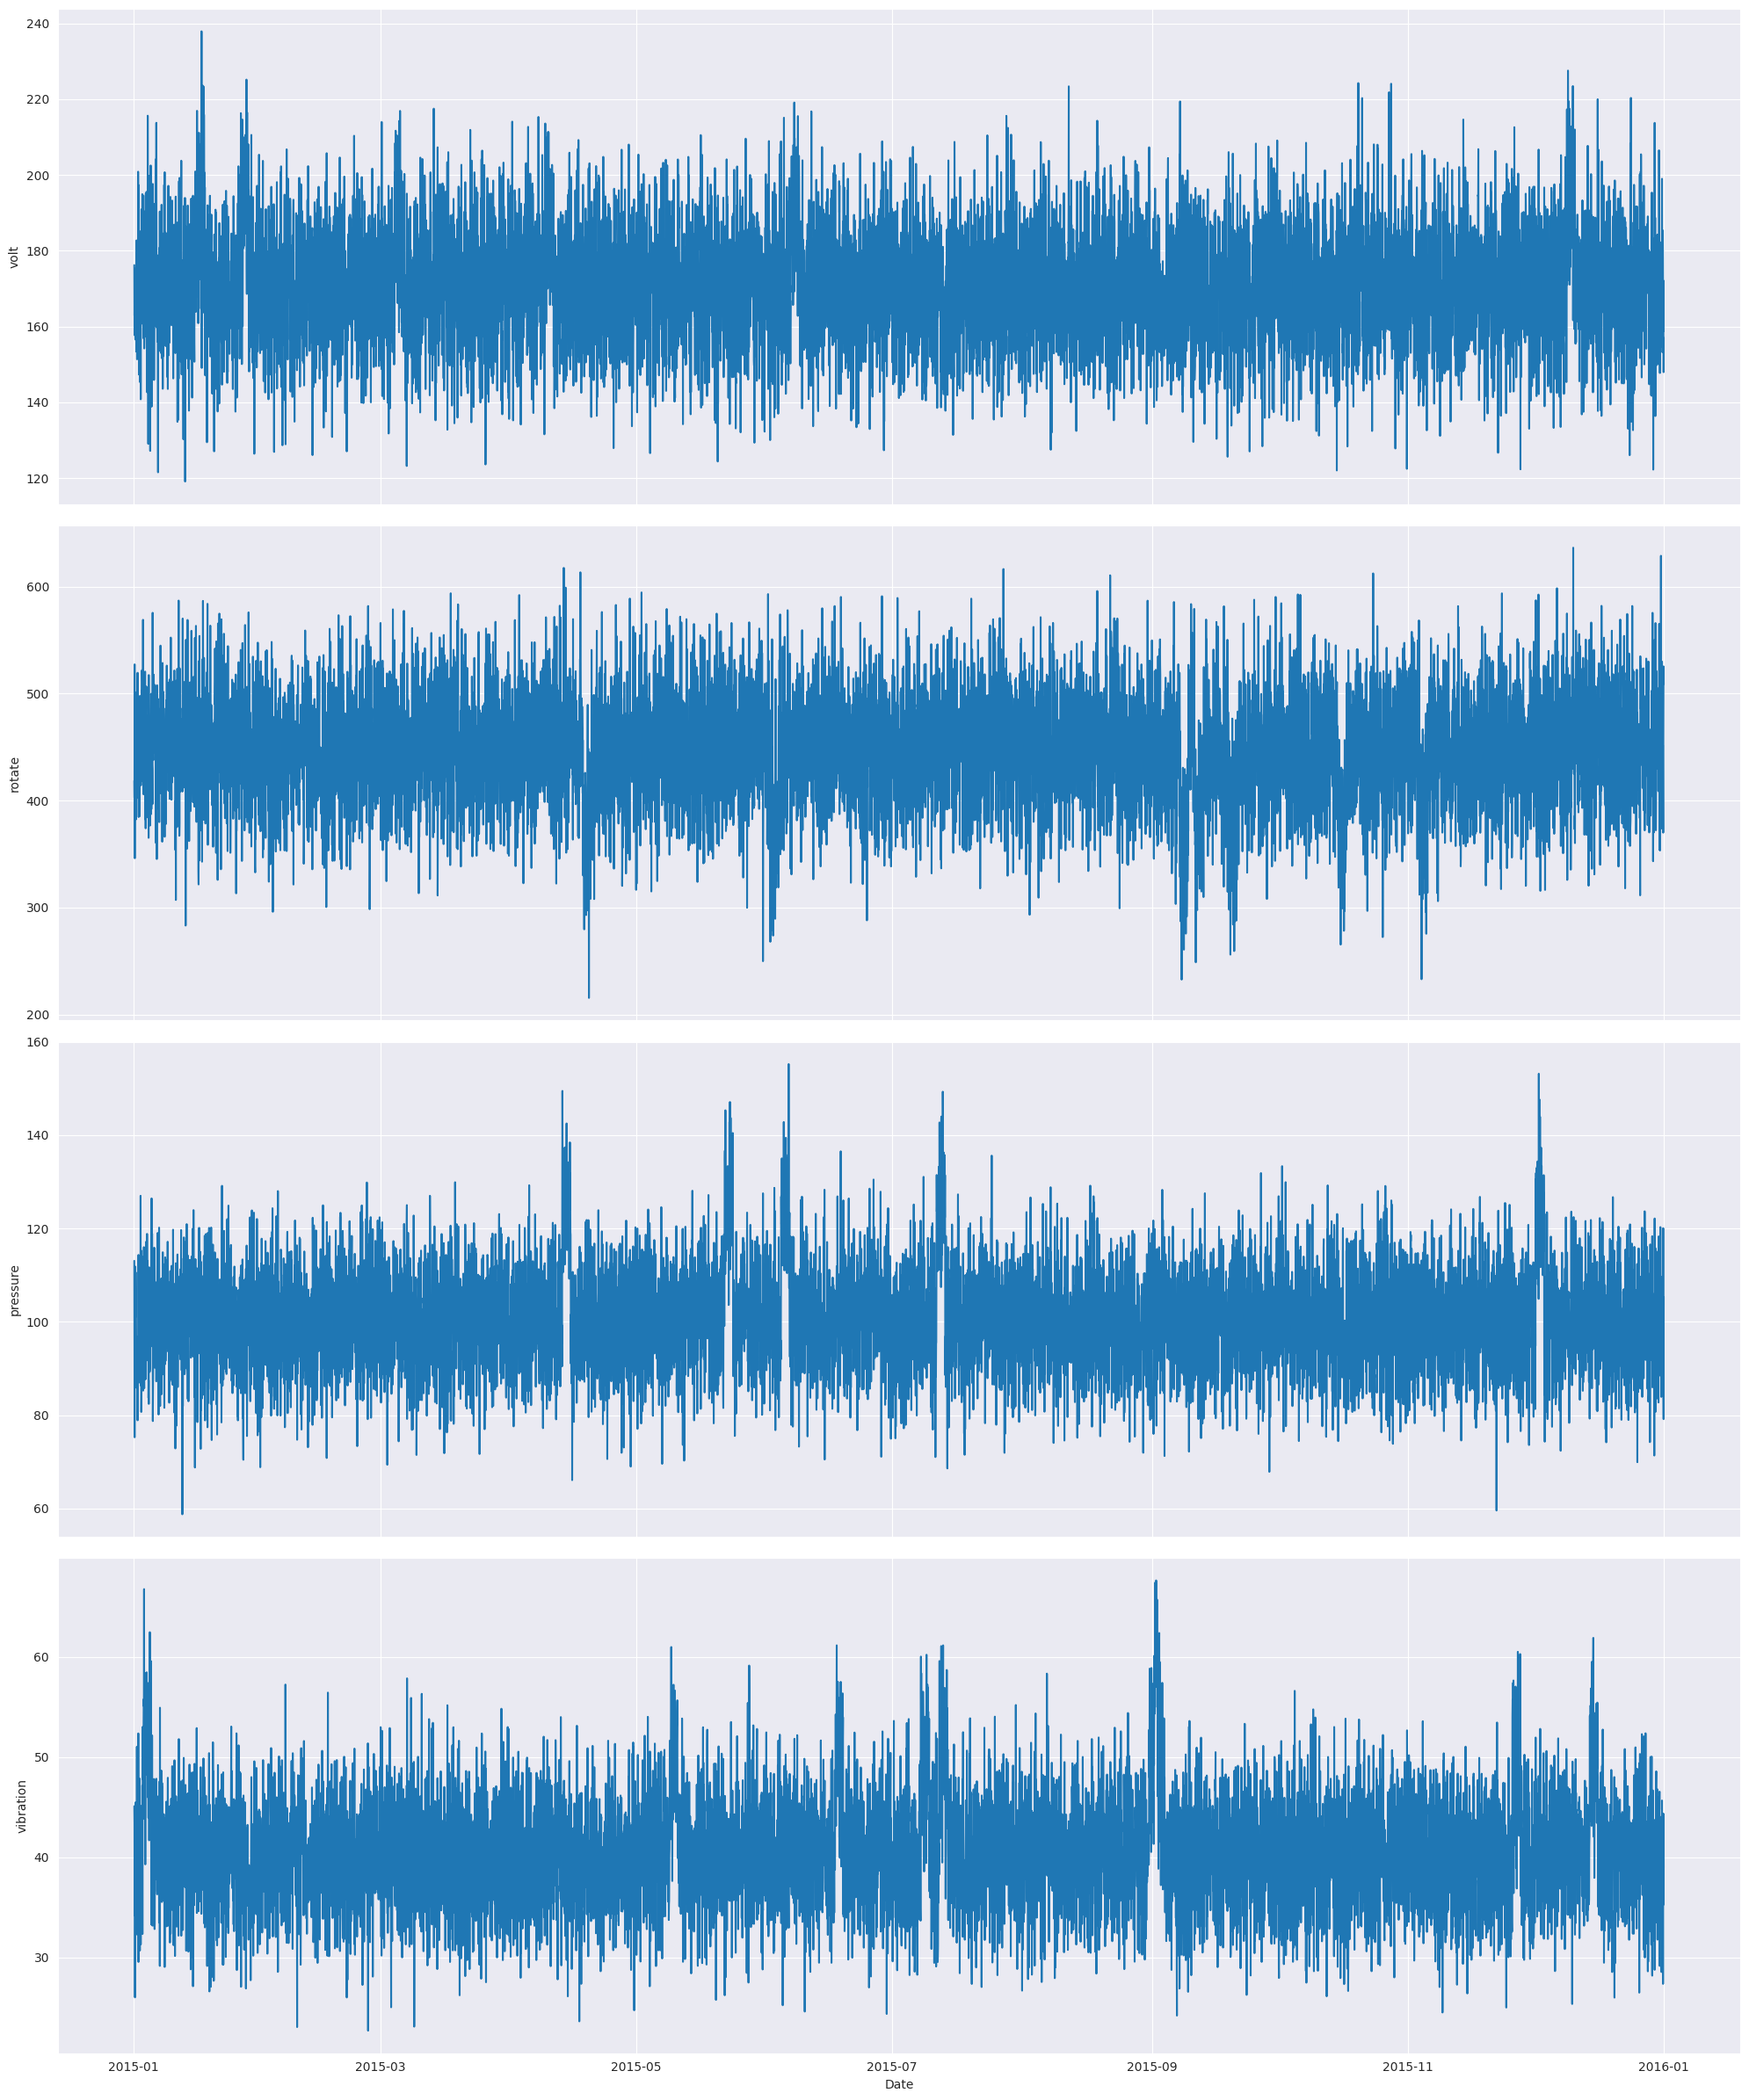

In [ ]:
#graph of all sensor elements for machine 1 for the entire year 2015-2016
import matplotlib.pyplot as plt

# Filter the data for machine 1 and the year 2015
machine_1_2015 = Telemetry[(Telemetry['machineID'] == 1) & (Telemetry['datetime'].dt.year == 2015)]

# Create subplots for each sensor
sensors = ['volt', 'rotate', 'pressure', 'vibration']
num_sensors = len(sensors)

fig, axs = plt.subplots(num_sensors, 1, figsize=(20, 6 * num_sensors), sharex=True)

for i, sensor in enumerate(sensors):
    ax = axs[i]
    ax.plot(machine_1_2015['datetime'], machine_1_2015[sensor])
    ax.set_ylabel(sensor)

plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [ ]:
Telemetry['year'] = Telemetry['datetime'].dt.year
Telemetry['month'] = Telemetry['datetime'].dt.month
volt_graph = Telemetry.groupby(['year', 'month', 'machineID'])['volt'].mean().reset_index()
volt_graph

,year,month,machineID,volt
0,2015,1,1,172.616892
1,2015,1,2,171.980008
2,2015,1,3,170.689776
3,2015,1,4,170.973860
4,2015,1,5,169.158095
...,...,...,...,...
336,2016,1,22,167.565692
337,2016,1,23,191.327317
338,2016,1,24,168.136011
339,2016,1,25,174.515385


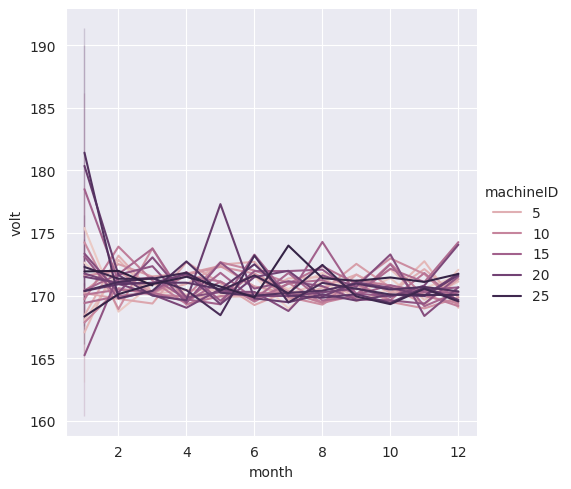

In [ ]:
sns.relplot(
    data=volt_graph, kind="line",
    x="month", y="volt", hue="machineID",
    sort=False)

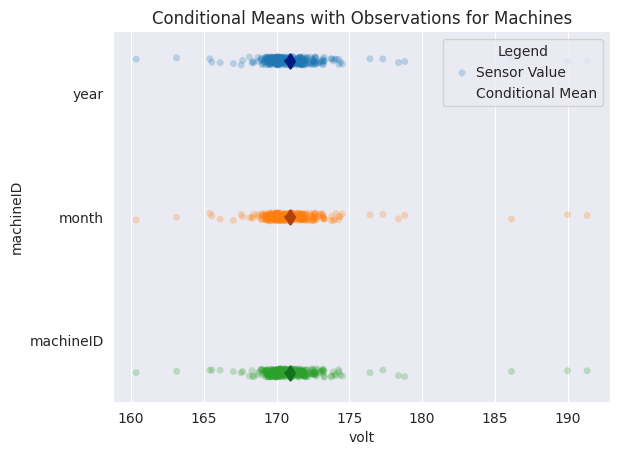

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the 'monthly_sensor_avg' DataFrame with columns: 'machineID' and 'volt'
volt_graph = volt_graph.melt(id_vars="volt", var_name="machineID")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(
    data=volt_graph, x="volt", y="machineID", hue="machineID",
    dodge=True, alpha=0.25, zorder=1, legend=False
)

# Show the conditional means (mean sensor values)
sns.pointplot(
    data=volt_graph, x="volt", y="machineID", hue="machineID",
    dodge=0.8 - 0.8 / 3, palette="dark", markers="d"
)

# Customize the legend (optional)
ax.legend(title="Legend", labels=['Sensor Value', 'Conditional Mean'], loc="upper right", frameon=True, handletextpad=0)

# Add a title (optional)
plt.title("Conditional Means with Observations for Machines")

plt.show()

### EDA on the Errors dataset (PdM_errors)

In [ ]:
path="/content/PdM_errors.csv"

errors= pd.read_csv(path)
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [ ]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [ ]:
errors.describe()

,machineID
count,3919.000000
mean,51.044654
std,28.954988
min,1.000000
25%,25.000000
50%,51.000000
75%,77.000000
max,100.000000


In [ ]:
errors.isna().sum()

datetime     0
machineID    0
errorID      0
dtype: int64

In [ ]:
#making sure that there are 100 machines
errors.machineID.value_counts()

22    60
78    54
99    54
49    51
81    51
      ..
19    28
86    27
31    26
6     23
77    22
Name: machineID, Length: 100, dtype: int64

In [ ]:
#chaninging datetime to date time format and making extra columns for month year and hourrs
errors["datetime"] = pd.to_datetime(errors['datetime'], format='%Y-%m-%d %H:%M:%S')


In [ ]:
error_month=errors.copy()
error_month["year"] = error_month["datetime"].dt.year
error_month["month"] = error_month["datetime"].dt.month
error_month["hours"] = error_month["datetime"].dt.hour

In [ ]:
error_month

,datetime,machineID,errorID,year,month,hours
0,2015-01-03 07:00:00,1,error1,2015,1,7
1,2015-01-03 20:00:00,1,error3,2015,1,20
2,2015-01-04 06:00:00,1,error5,2015,1,6
3,2015-01-10 15:00:00,1,error4,2015,1,15
4,2015-01-22 10:00:00,1,error4,2015,1,10
...,...,...,...,...,...,...
3914,2015-11-21 08:00:00,100,error2,2015,11,8
3915,2015-12-04 02:00:00,100,error1,2015,12,2
3916,2015-12-08 06:00:00,100,error2,2015,12,6
3917,2015-12-08 06:00:00,100,error3,2015,12,6


In [ ]:
#checking the start and end time of the errors
errors["datetime"].describe()

<ipython-input-33-3a06ce7b53a4>:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    3919
unique                   2720
top       2015-12-08 06:00:00
freq                       12
first     2015-01-01 06:00:00
last      2016-01-01 05:00:00
Name: datetime, dtype: object

In [ ]:
# counting the number of errors
#error 1 seesm to be the most frequent
errors["errorID"].value_counts()


error1    1010
error2     988
error3     838
error4     727
error5     356
Name: errorID, dtype: int64

In [ ]:
#checking the total number of error types per month
error_month = error_month.groupby(["month", "errorID"]).size().reset_index(name="monthly_error_count")
error_month

,month,errorID,monthly_error_count
0,1,error1,96
1,1,error2,81
2,1,error3,79
3,1,error4,69
4,1,error5,33
5,2,error1,89
6,2,error2,62
7,2,error3,59
8,2,error4,44
9,2,error5,37


In [ ]:
#checking the most frequent error that  occurs per  month
max_error_per_month = error_month.groupby('month')['monthly_error_count'].idxmax()
max_errors = error_month.loc[max_error_per_month]
max_errors

# it seems that error one and two is the most frequent type of errors to occur

,month,errorID,monthly_error_count
0,1,error1,96
5,2,error1,89
10,3,error1,95
15,4,error1,83
21,5,error2,87
25,6,error1,83
31,7,error2,86
36,8,error2,98
40,9,error1,89
46,10,error2,99


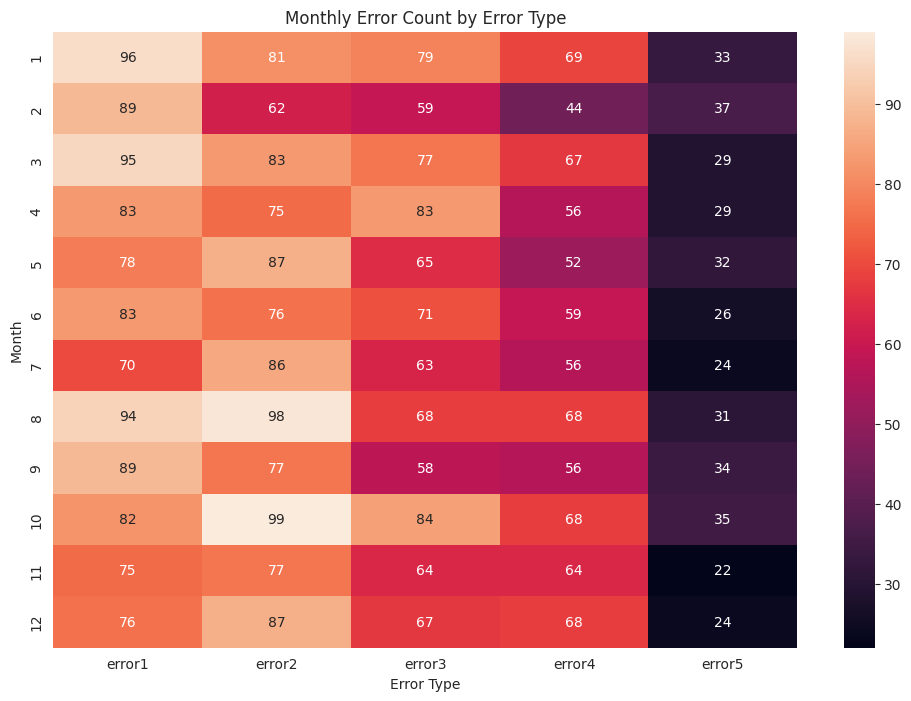

In [ ]:
plt.figure(figsize=(12, 8))
heatmap_data = error_month.pivot_table(index="month", columns="errorID", values="monthly_error_count", fill_value=0)
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(heatmap_data,annot=True, fmt="d")
plt.title("Monthly Error Count by Error Type")
plt.xlabel("Error Type")
plt.ylabel("Month")
plt.show()

In [ ]:
#total amount of errors per machineID


total_erorrcount= errors.groupby(["machineID"])["errorID"].count()

total_erorrcount = total_erorrcount.reset_index()
total_erorrcount["total_errors"]=total_erorrcount["errorID"]
total_erorrcount.drop(['errorID'], axis=1)

,machineID,total_errors
0,1,35
1,2,28
2,3,39
3,4,31
4,5,38
...,...,...
95,96,39
96,97,45
97,98,45
98,99,54


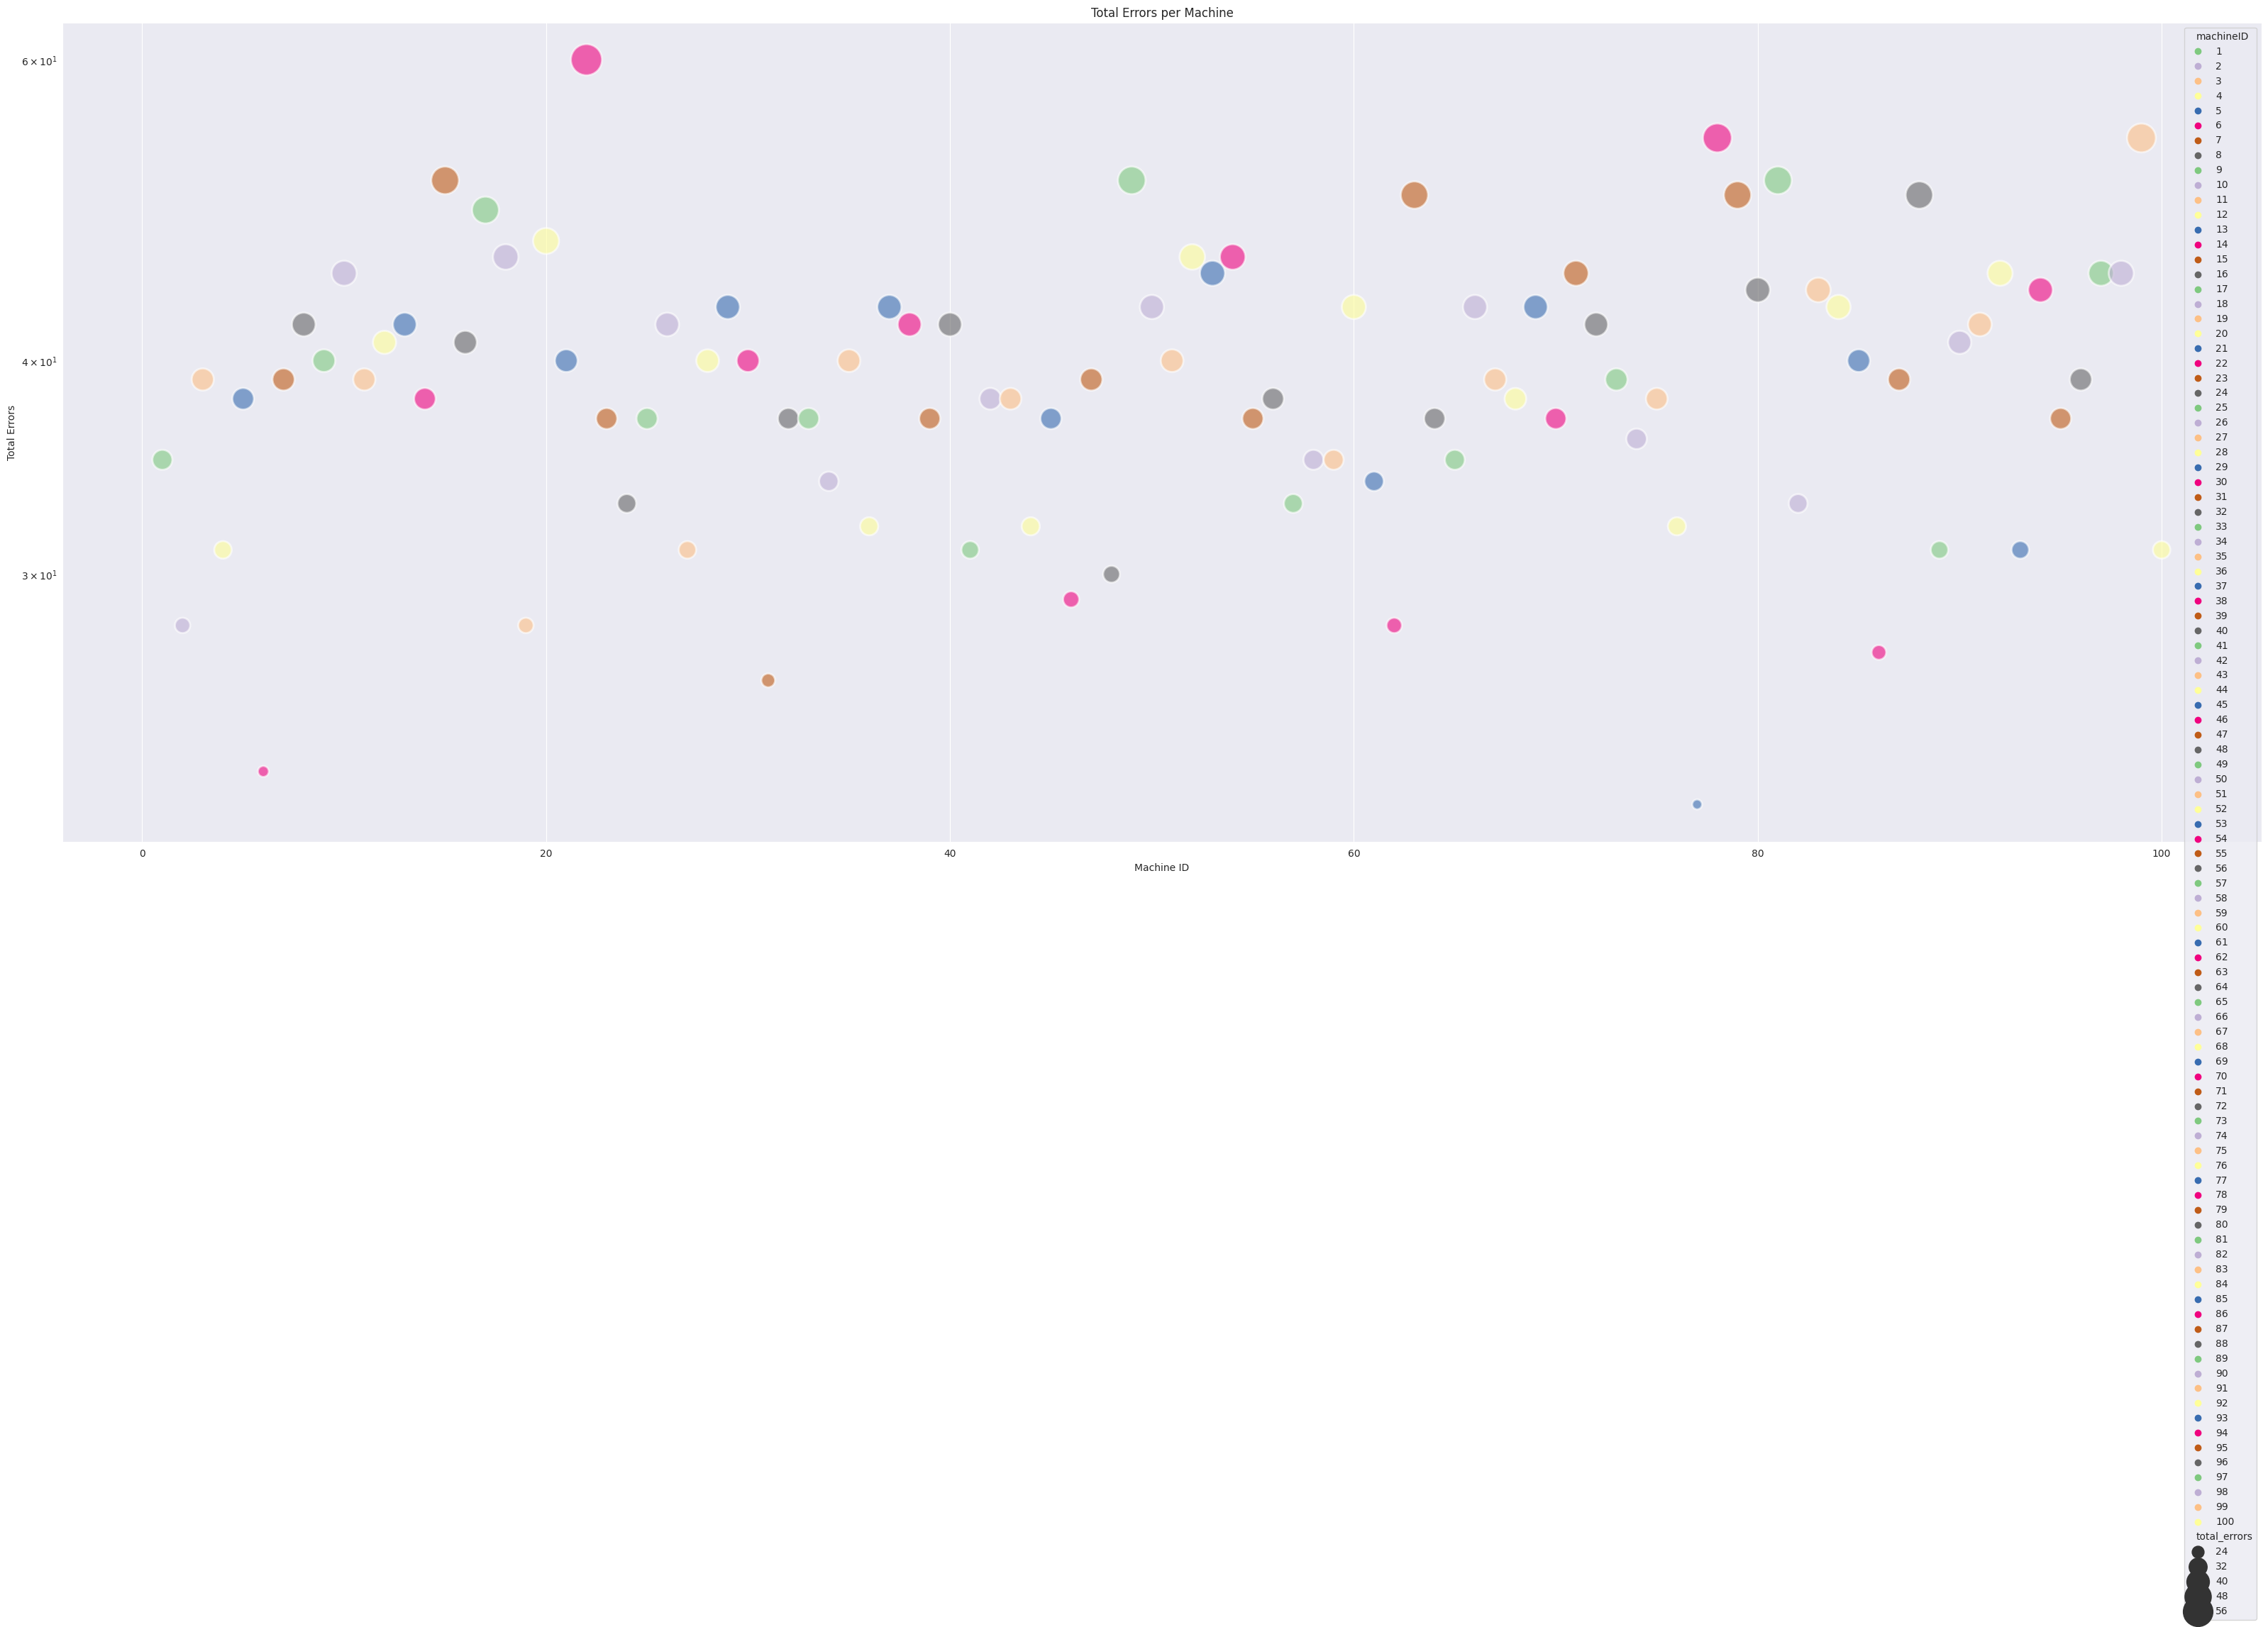

In [ ]:
# Set the figure size
plt.figure(figsize=(40, 15))

# Scatterplot
sns.scatterplot(
    data=total_erorrcount,
    x="machineID",
    y="total_errors",
    size="total_errors",  # Use total_errors for bubble size
    sizes=(100, 1000),  # Adjust the size range as needed
    hue="machineID",
    palette="Accent",
    alpha=0.6,
    edgecolors="white",
    linewidth=2
)

# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Machine ID")
plt.ylabel("Total Errors")
plt.title("Total Errors per Machine")
plt.xticks(rotation=0)
plt.show()

In [ ]:
fig = px.bar(x=errors['errorID'].values,
             title='Count of types of Errors ', template='simple_white', color=errors['errorID'])
fig.update_layout(xaxis_title='Error Type', yaxis_title='Count')
fig.show()

In [ ]:
errors

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


In [ ]:
#seeing all errors per machine
#Seeing the general count of each machenId's errors and the amount of those errors that the machine encounters
machine_error_count= errors.groupby(["machineID","errorID"]).count()
machine_error_count

machine_error_count = machine_error_count.reset_index()
machine_error_count['error_count'] = machine_error_count['datetime']
machine_error_count = machine_error_count[['machineID', 'errorID', 'error_count']]


In [ ]:
#checking the exact error_count per error ID for a speficied machineID
machine_error_count[machine_error_count["machineID"]==23]

,machineID,errorID,error_count
108,23,error1,8
109,23,error2,9
110,23,error3,6
111,23,error4,6
112,23,error5,8


In [ ]:
import plotly.express as px

# Assuming you have a DataFrame named machine_error_count
fig = px.bar(machine_error_count.reset_index(), x="machineID", y="error_count", color="errorID", title="Count of Errors per Machine",
             labels={"count": "Count", "errorID": "Error Type", "machineID": "Machine ID"})

fig.show()


### EDA on the Maint dataset (PdM_maint)

In [ ]:
path ="/content/PdM_maint.csv"
maintenance= pd.read_csv(path)
maintenance.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [ ]:
maintenance.isnull().sum()

datetime     0
machineID    0
comp         0
dtype: int64

In [ ]:
maintenance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


In [ ]:
maintenance.describe()

,machineID
count,3286.000000
mean,50.284236
std,28.914478
min,1.000000
25%,25.250000
50%,50.000000
75%,75.000000
max,100.000000


In [ ]:
# convert datetime into datetime
maintenance["datetime"] = pd.to_datetime(maintenance['datetime'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# sort datetime and machine_ID in ascending order
maintenance.sort_values(["datetime", "machineID"], inplace=True, ignore_index=True)

In [ ]:
maintenance.sort_values

<bound method DataFrame.sort_values of                 datetime  machineID   comp
0    2014-06-01 06:00:00          1  comp2
1    2014-06-01 06:00:00          6  comp2
2    2014-06-01 06:00:00          9  comp1
3    2014-06-01 06:00:00          9  comp2
4    2014-06-01 06:00:00         11  comp2
...                  ...        ...    ...
3281 2016-01-01 06:00:00         35  comp2
3282 2016-01-01 06:00:00         42  comp4
3283 2016-01-01 06:00:00         43  comp1
3284 2016-01-01 06:00:00         55  comp3
3285 2016-01-01 06:00:00         78  comp3

[3286 rows x 3 columns]>

# maintenance data has the date from June 2014, where other dataset are present from 2015. Therefore, finding missing dates between 2014 & 2015

In [ ]:
def get_missing_dates(datetime, start_date, end_date, freq="H"): #It returns the missing dates in datetime betweeb start and end date
  return pd.date_range(start=start_date, end=end_date, freq=freq).difference(datetime)

In [ ]:
get_missing_dates(maintenance.datetime,
                  start_date="2014-06-01 06:00:00",
                  end_date="2016-01-01 06:00:00",
                  freq='H')

DatetimeIndex(['2014-06-01 07:00:00', '2014-06-01 08:00:00',
               '2014-06-01 09:00:00', '2014-06-01 10:00:00',
               '2014-06-01 11:00:00', '2014-06-01 12:00:00',
               '2014-06-01 13:00:00', '2014-06-01 14:00:00',
               '2014-06-01 15:00:00', '2014-06-01 16:00:00',
               ...
               '2015-12-31 20:00:00', '2015-12-31 21:00:00',
               '2015-12-31 22:00:00', '2015-12-31 23:00:00',
               '2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00'],
              dtype='datetime64[ns]', length=13523, freq=None)

#Components are replaced in two cases:

Technician replaced it during regularly scheduled visit (Proactive Maintenance)

A component fails, and then the technician performs unscheduled maintenance to replace the component (Reactive Maintenance).

#Plot number of maintenance records across month

# number of maintenance records across 'machineID'

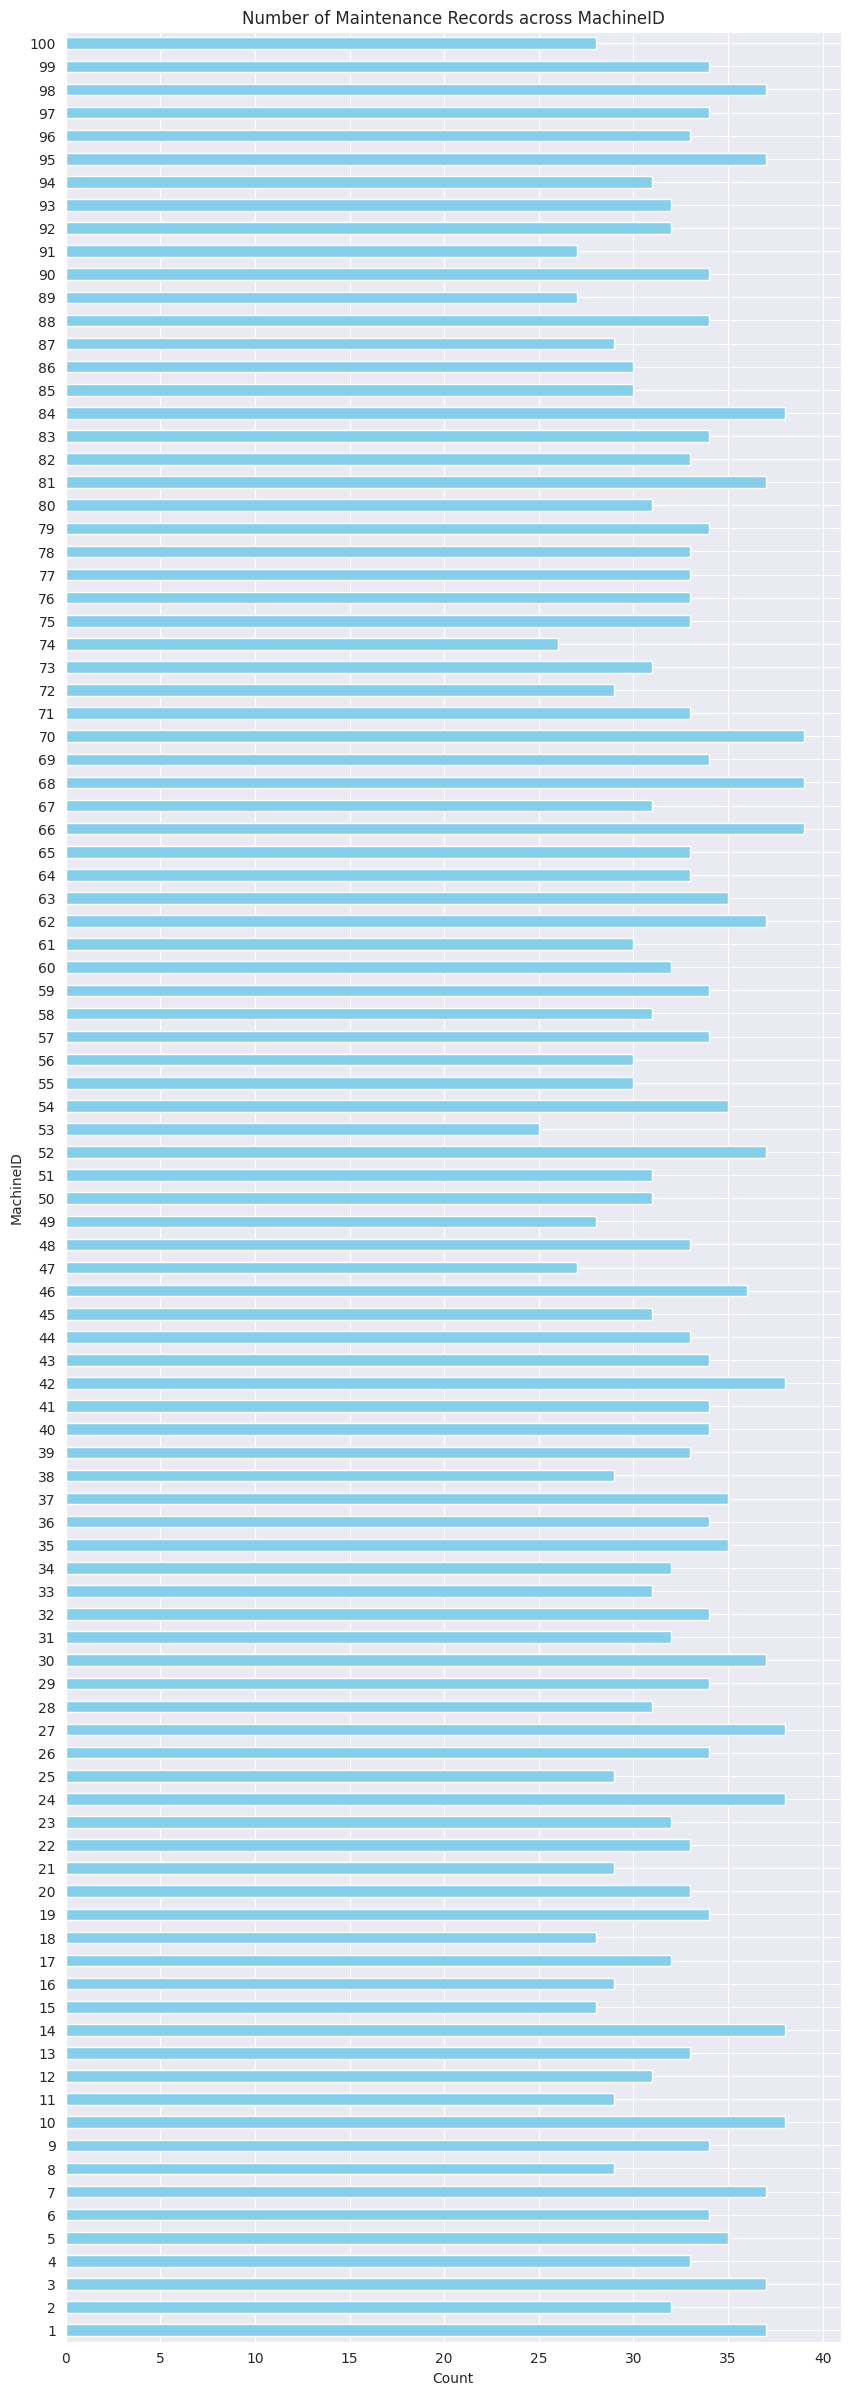

In [ ]:
maintenance_counts = maintenance['machineID'].value_counts()

# Sort the counts by machineID in ascending order
maintenance_counts_sorted = maintenance_counts.sort_index()

plt.figure(figsize=(10, 30))
maintenance_counts_sorted.plot(kind='barh', color='skyblue')
plt.title('Number of Maintenance Records across MachineID')
plt.xlabel('Count')
plt.ylabel('MachineID')
plt.show()

#Total no. of maintenance records

In [ ]:
maintenance['comp'] = maintenance['comp'].astype('category')
print("Total Number of maintenance Records: %d" %len(maintenance.index))
maintenance.head()

Total Number of maintenance Records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-06-01 06:00:00,6,comp2
2,2014-06-01 06:00:00,9,comp1
3,2014-06-01 06:00:00,9,comp2
4,2014-06-01 06:00:00,11,comp2


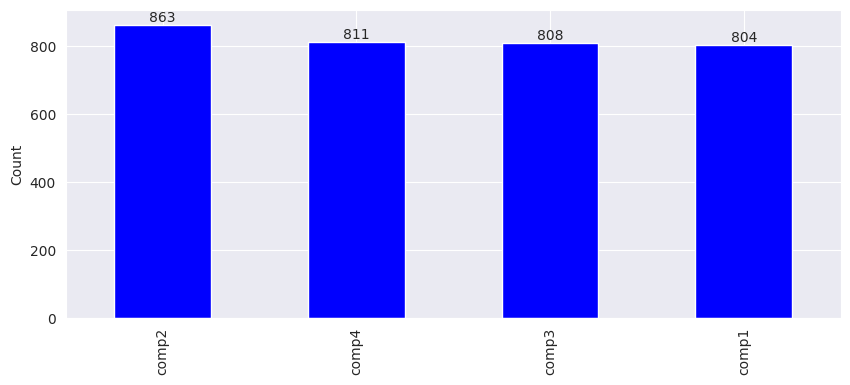

In [ ]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 4))

maintenance['comp'].value_counts().plot(kind='bar', color='blue')  # You can change the color as needed

plt.ylabel('Count')

for i, count in enumerate(maintenance['comp'].value_counts()):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()


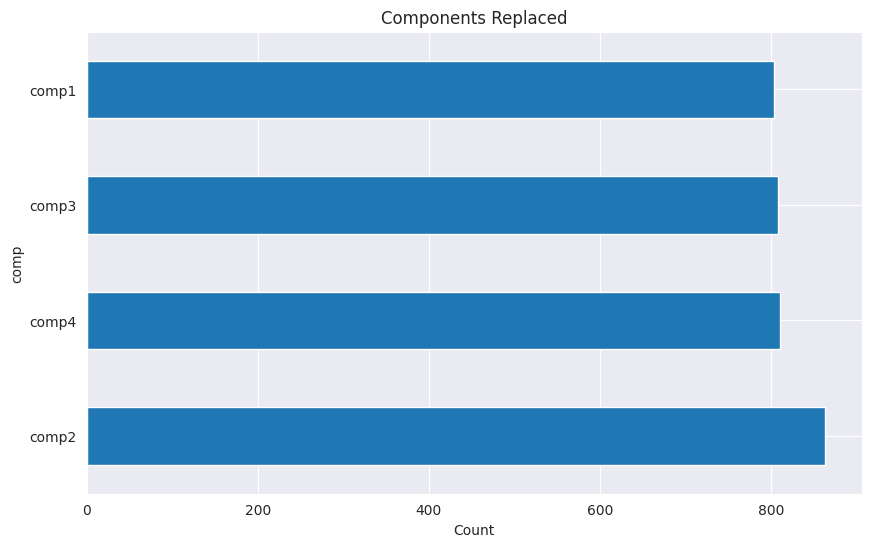

In [ ]:
import matplotlib.pyplot as plt

def plot_barh(data, feature_name, figsize=(10, 6), normalize=False, title=None):
    # Count the occurrences of each unique value in the specified feature
    component_counts = data[feature_name].value_counts(normalize=normalize)

    # Create a horizontal bar plot
    plt.figure(figsize=figsize)
    component_counts.plot(kind='barh')

    # Set plot title and labels
    plt.title(title if title else f"{feature_name} Counts")
    plt.xlabel("Count")
    plt.ylabel(feature_name)

    # Display the plot
    plt.show()

# Example usage
plot_barh(maintenance,
          feature_name="comp",
          figsize=(10, 6),
          normalize=False,
          title="Components Replaced")

#Number of maintenance record across time

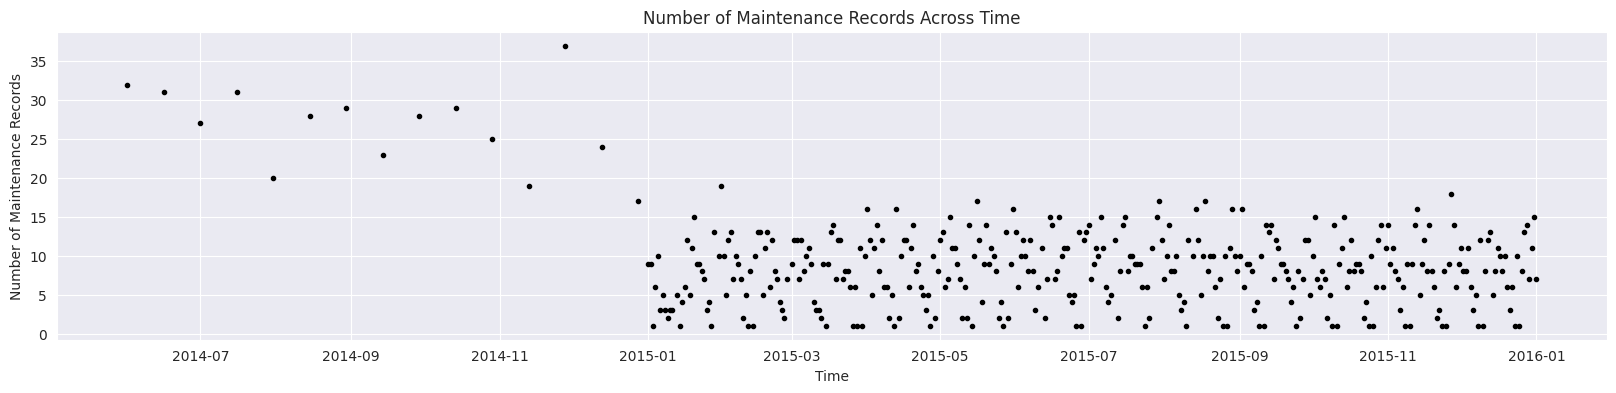

In [ ]:
maintenance['datetime'] = pd.to_datetime(maintenance['datetime'], errors='coerce')

# Ensure that the column has datetime-like values, if not, it will contain NaT (Not a Time)
maintenance["datetime"].dt.date.dropna().value_counts().plot(
    style="k.",
    figsize=(20, 4)
)

plt.title("Number of Maintenance Records Across Time")
plt.ylabel("Number of Maintenance Records")
plt.xlabel("Time")
plt.show()

# Count occurrences of each 'comp' value per 'machineid'

In [ ]:
result = maintenance.groupby(['machineID', 'comp']).count()
result = result.reset_index()
result['comp_count'] = result['datetime']
result = result[['machineID', 'comp', 'comp_count']]

import plotly.express as px

color_discrete_map = {'comp1': 'black', 'comp2': 'blue', 'comp3': 'pink', 'comp4': 'orange'}

fig = px.bar(result.reset_index(), x="machineID", y="comp_count", color="comp", title="Count of Comp per MachineID",
             labels={"count": "Count", "errorID": "Error Type", "machineID": "Machine ID"},
             color_discrete_map=color_discrete_map)

fig.show()


### EDA on the Failures dataset (PdM_failures)

1.   List item
2.   List item



In [ ]:
failures = pd.read_csv('/content/PdM_failures.csv')

In [ ]:
failures.head()


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
failures.isna().sum()

datetime     0
machineID    0
failure      0
dtype: int64

In [ ]:
# Counting the number of records in failures
len(failures.index)

761

In [ ]:
# Checking data type in failures
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [ ]:
# Converting object to datetime
failures['datetime'] = pd.to_datetime(
    failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('object')

In [ ]:
failures.describe

<bound method NDFrame.describe of                datetime  machineID failure
0   2015-01-05 06:00:00          1   comp4
1   2015-03-06 06:00:00          1   comp1
2   2015-04-20 06:00:00          1   comp2
3   2015-06-19 06:00:00          1   comp4
4   2015-09-02 06:00:00          1   comp4
..                  ...        ...     ...
756 2015-11-29 06:00:00         99   comp3
757 2015-12-14 06:00:00         99   comp4
758 2015-02-12 06:00:00        100   comp1
759 2015-09-10 06:00:00        100   comp1
760 2015-12-09 06:00:00        100   comp2

[761 rows x 3 columns]>

#Displaying Count of different failure types#

<ipython-input-67-c3e5b85c27cb>:2: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



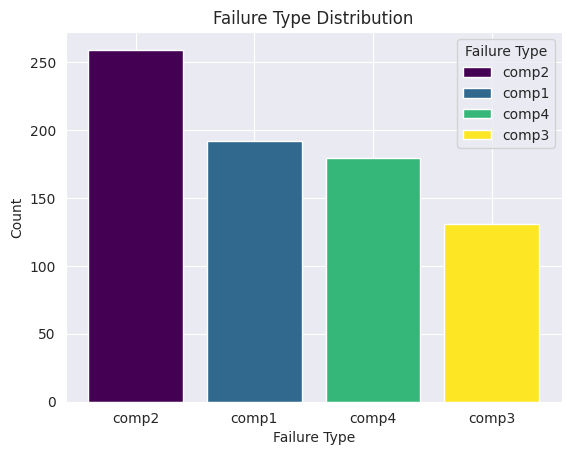

In [ ]:
failure_counts = failures['failure'].value_counts()
colors = plt.cm.get_cmap('viridis', len(failure_counts))
bars = plt.bar(failure_counts.index, failure_counts, color=colors(np.arange(len(failure_counts))))
plt.legend(bars, failure_counts.index, title='Failure Type')

plt.title('Failure Type Distribution')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

#Displaying errors and failures for machine ID= 1#

In [ ]:
telemetryP = Telemetry.loc[Telemetry['machineID'] == 1].reset_index(drop=True)
fail1 = failures.loc[failures['machineID'] == 1]
err1 = errors.loc[errors['machineID'] == 1]

<ipython-input-69-c0e64a1595c9>:9: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



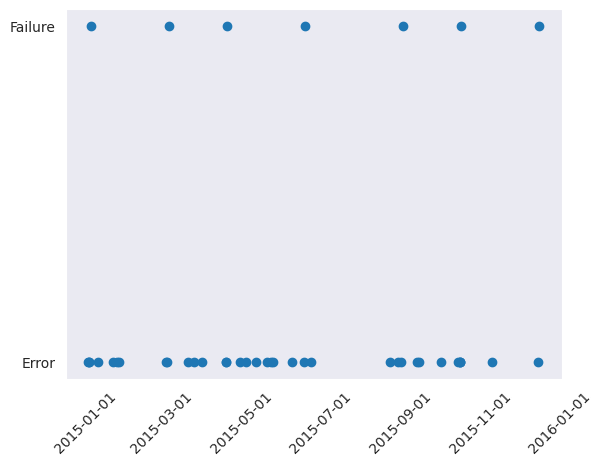

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()

y_category = ['Failure'] * len(fail1) + ['Error'] * len(err1)

df_timestamp = pd.concat([fail1['datetime'], err1['datetime']], ignore_index=True, axis=0)
df_plot = pd.DataFrame({"timestamp": df_timestamp, "category": y_category})
df_plot.loc[:, 'timestamp'] = pd.to_datetime(df_plot.loc[:, 'timestamp'])
df_plot.sort_values(by=['timestamp'], inplace=True, ignore_index=True)

ax.scatter('timestamp', 'category', data=df_plot)
yearfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(yearfmt)
ax.tick_params(axis='x', rotation=45)
ax.grid()

plt.show()

#Displaying age of different models#

#**Check Autocorellation for Machine ID = 1**#

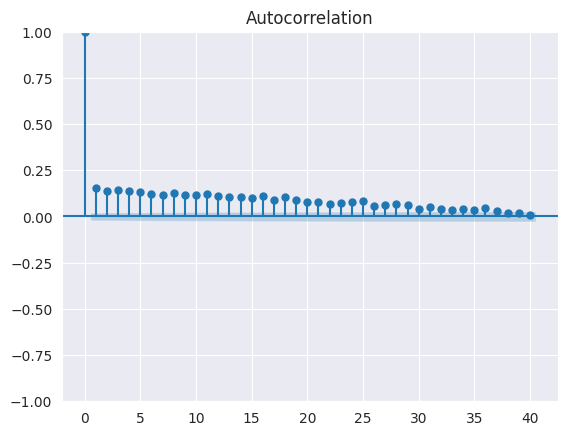

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(telemetryP['pressure'], lags = 40)
plt.show()

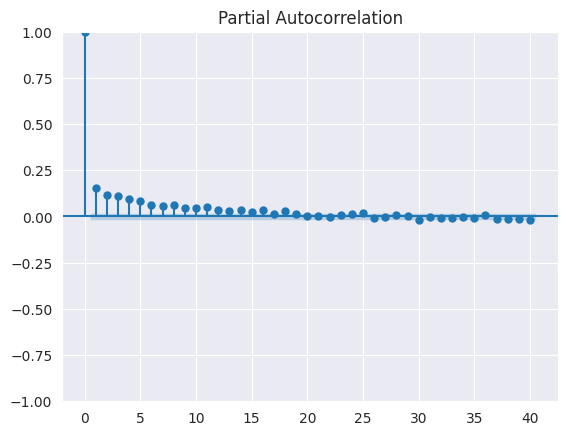

In [ ]:
plot_pacf(telemetryP['pressure'], lags = 40)
plt.show()

#Feature Engineering

### Feature Engineering on the Telemetry dataset

 ## Make sure there are no null values before modeling because it won't work if there are any


In [ ]:
Telemetry["datetime"] = pd.to_datetime(Telemetry['datetime'], format='%Y-%m-%d %H:%M:%S')

import pandas as pd

def calculate_rolling_statistics(df, col, agg_func, window=3, resample_freq='3H'):
    return (pd.pivot_table(df, index='datetime', columns='machineID', values=col)
            .rolling(window=window)
            .agg(agg_func)
            .resample(resample_freq, closed='left', label='right')
            .agg(agg_func)
            .unstack())

fields = ['volt', 'rotate', 'pressure', 'vibration']
agg_funcs = {'mean': 'mean','max':'max','min':'min'}

telemetry_mean_3h = pd.concat([calculate_rolling_statistics(Telemetry, col, agg_func)
                                for col in fields
                                for agg_func in agg_funcs],
                               axis=1)

telemetry_mean_3h.columns = [f'{col}{agg}_3h' for col in fields for agg in agg_funcs.keys()]
telemetry_mean_3h.reset_index(inplace=True)
telemetry_mean_3h = telemetry_mean_3h.loc[-telemetry_mean_3h['voltmean_3h'].isnull()]

print(telemetry_mean_3h.head(10))

   machineID            datetime  voltmean_3h  voltmax_3h  voltmin_3h  \
0          1 2015-01-01 09:00:00   170.028993  176.217853  162.879223   
1          1 2015-01-01 12:00:00   164.441379  172.504839  157.610021   
2          1 2015-01-01 15:00:00   165.850875  175.324524  156.556031   
3          1 2015-01-01 18:00:00   169.468113  175.324524  160.263954   
4          1 2015-01-01 21:00:00   164.829225  182.739113  153.353492   
5          1 2015-01-02 00:00:00   171.779786  182.739113  151.335682   
6          1 2015-01-02 03:00:00   171.448865  180.097495  151.335682   
7          1 2015-01-02 06:00:00   173.520075  200.872430  158.271400   
8          1 2015-01-02 09:00:00   184.267500  200.872430  160.528861   
9          1 2015-01-02 12:00:00   158.719131  173.394523  147.300678   

   rotatemean_3h  rotatemax_3h  rotatemin_3h  pressuremean_3h  pressuremax_3h  \
0     449.533798    527.349825    402.747490        94.592122      113.077935   
1     421.885806    527.349825    

In [ ]:
telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,voltmax_3h,voltmin_3h,rotatemean_3h,rotatemax_3h,rotatemin_3h,pressuremean_3h,pressuremax_3h,pressuremin_3h,vibrationmean_3h,vibrationmax_3h,vibrationmin_3h
0,1,2015-01-01 09:00:00,170.028993,176.217853,162.879223,449.533798,527.349825,402.747490,94.592122,113.077935,75.237905,40.893502,45.087686,34.178847
1,1,2015-01-01 12:00:00,164.441379,172.504839,157.610021,421.885806,527.349825,346.149335,99.264706,111.886648,75.237905,35.863793,43.413973,25.990511
2,1,2015-01-01 15:00:00,165.850875,175.324524,156.556031,445.681853,499.071623,398.648781,105.737146,111.886648,95.927042,38.000957,45.482287,25.990511
3,1,2015-01-01 18:00:00,169.468113,175.324524,160.263954,422.502848,460.850670,382.483543,104.537422,110.624361,96.480976,41.116341,45.482287,35.482009
4,1,2015-01-01 21:00:00,164.829225,182.739113,153.353492,443.281168,490.672921,382.483543,92.776181,103.780663,86.012440,41.618121,44.108554,38.543681


In [ ]:
import pandas as pd

def calculate_rolling_statistics(df, col, agg_func, window=24, resample_freq='3H'):
    return (pd.pivot_table(df, index='datetime', columns='machineID', values=col)
            .rolling(window=window)
            .agg(agg_func)
            .resample(resample_freq, closed='left', label='right')
            .agg(agg_func)
            .unstack())

fields = ['volt', 'rotate', 'pressure', 'vibration']
agg_funcs = {'mean': 'mean','max':'max','min':'min'}

telemetry_mean_24h = pd.concat([calculate_rolling_statistics(Telemetry, col, agg_func)
                                for col in fields
                                for agg_func in agg_funcs],
                               axis=1)

telemetry_mean_24h.columns = [f'{col}{agg}_24h' for col in fields for agg in agg_funcs.keys()]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

# Display the resulting DataFrame
print(telemetry_mean_24h.head(10))

    machineID            datetime  voltmean_24h  voltmax_24h  voltmin_24h  \
7           1 2015-01-02 06:00:00    169.733809   200.872430   151.335682   
8           1 2015-01-02 09:00:00    170.700727   200.872430   151.335682   
9           1 2015-01-02 12:00:00    169.985446   200.872430   147.300678   
10          1 2015-01-02 15:00:00    170.960571   200.872430   147.300678   
11          1 2015-01-02 18:00:00    170.245587   200.872430   145.248486   
12          1 2015-01-02 21:00:00    169.578060   200.872430   140.776309   
13          1 2015-01-03 00:00:00    169.095238   200.872430   140.776309   
14          1 2015-01-03 03:00:00    169.885627   200.872430   140.776309   
15          1 2015-01-03 06:00:00    170.636975   200.872430   140.776309   
16          1 2015-01-03 09:00:00    169.697564   194.942847   140.776309   

    rotatemean_24h  rotatemax_24h  rotatemin_24h  pressuremean_24h  \
7       445.179865     527.349825     346.149335         96.797113   
8       445.

In [ ]:
telemetry_mean_24h.head(5)

,machineID,datetime,voltmean_24h,voltmax_24h,voltmin_24h,rotatemean_24h,rotatemax_24h,rotatemin_24h,pressuremean_24h,pressuremax_24h,pressuremin_24h,vibrationmean_24h,vibrationmax_24h,vibrationmin_24h
7,1,2015-01-02 06:00:00,169.733809,200.87243,151.335682,445.179865,527.349825,346.149335,96.797113,113.077935,75.237905,40.385160,52.355876,25.990511
8,1,2015-01-02 09:00:00,170.700727,200.87243,151.335682,445.294112,527.349825,346.149335,97.232172,114.342061,75.237905,39.647643,52.355876,25.990511
9,1,2015-01-02 12:00:00,169.985446,200.87243,147.300678,446.515432,519.452812,382.483543,97.151686,114.342061,78.880780,39.823493,52.355876,25.990511
10,1,2015-01-02 15:00:00,170.960571,200.87243,147.300678,444.937067,519.452812,382.483543,96.499794,114.342061,78.880780,40.230225,52.355876,29.527665
11,1,2015-01-02 18:00:00,170.245587,200.87243,145.248486,451.249384,519.452812,382.483543,96.077177,114.342061,78.880780,39.960667,52.355876,29.527665


In [ ]:
telemetry_features = Telemetry.merge(telemetry_mean_3h, on=['datetime', 'machineID'], how='left')\
                              .merge(telemetry_mean_24h, on=['datetime', 'machineID'], how='left')\
                              .dropna()

telemetry_features.head()

,datetime,machineID,volt,rotate,pressure,vibration,year,month,voltmean_3h,voltmax_3h,...,voltmin_24h,rotatemean_24h,rotatemax_24h,rotatemin_24h,pressuremean_24h,pressuremax_24h,pressuremin_24h,vibrationmean_24h,vibrationmax_24h,vibrationmin_24h
24,2015-01-02 06:00:00,1,197.363125,446.943947,114.342061,29.527665,2015,1,173.520075,200.872430,...,151.335682,445.179865,527.349825,346.149335,96.797113,113.077935,75.237905,40.385160,52.355876,25.990511
27,2015-01-02 09:00:00,1,147.300678,420.610792,110.408985,34.203042,2015,1,184.267500,200.872430,...,151.335682,445.294112,527.349825,346.149335,97.232172,114.342061,75.237905,39.647643,52.355876,25.990511
30,2015-01-02 12:00:00,1,185.205355,445.606447,105.993247,47.862484,2015,1,158.719131,173.394523,...,147.300678,446.515432,519.452812,382.483543,97.151686,114.342061,78.880780,39.823493,52.355876,25.990511
33,2015-01-02 15:00:00,1,180.030715,486.893593,93.743827,43.099758,2015,1,173.651877,185.205355,...,147.300678,444.937067,519.452812,382.483543,96.499794,114.342061,78.880780,40.230225,52.355876,29.527665
36,2015-01-02 18:00:00,1,165.258225,493.161428,127.014498,45.135194,2015,1,163.748237,180.030715,...,145.248486,451.249384,519.452812,382.483543,96.077177,114.342061,78.880780,39.960667,52.355876,29.527665


In [ ]:
duplicate_columns = telemetry_features.columns[telemetry_features.columns.duplicated()]

In [ ]:
duplicate_columns

Index([], dtype='object')

In [ ]:
#making sure that there are no null values
telemetry_features.isna().sum()

datetime             0
machineID            0
volt                 0
rotate               0
pressure             0
vibration            0
year                 0
month                0
voltmean_3h          0
voltmax_3h           0
voltmin_3h           0
rotatemean_3h        0
rotatemax_3h         0
rotatemin_3h         0
pressuremean_3h      0
pressuremax_3h       0
pressuremin_3h       0
vibrationmean_3h     0
vibrationmax_3h      0
vibrationmin_3h      0
voltmean_24h         0
voltmax_24h          0
voltmin_24h          0
rotatemean_24h       0
rotatemax_24h        0
rotatemin_24h        0
pressuremean_24h     0
pressuremax_24h      0
pressuremin_24h      0
vibrationmean_24h    0
vibrationmax_24h     0
vibrationmin_24h     0
dtype: int64

### Feature Engineering on the Errors dataset

In [ ]:
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count.head()
error_count

,datetime,machineID,errorID_error1,errorID_error2,errorID_error3,errorID_error4,errorID_error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
...,...,...,...,...,...,...,...
3914,2015-11-21 08:00:00,100,0,1,0,0,0
3915,2015-12-04 02:00:00,100,1,0,0,0,0
3916,2015-12-08 06:00:00,100,0,1,0,0,0
3917,2015-12-08 06:00:00,100,0,0,1,0,0


In [ ]:
error_count.columns = ['datetime', 'machineID',
                       'error1', 'error2', 'error3', 'error4', 'error5']

In [ ]:
error_count.head(10)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
5,2015-01-25 15:00:00,1,0,0,0,1,0
6,2015-01-27 04:00:00,1,1,0,0,0,0
7,2015-03-03 22:00:00,1,0,1,0,0,0
8,2015-03-05 06:00:00,1,1,0,0,0,0
9,2015-03-20 18:00:00,1,1,0,0,0,0


In [ ]:
error_count["datetime"] = pd.to_datetime(error_count['datetime'], format='%Y-%m-%d %H:%M:%S')

error_count = Telemetry[['datetime', 'machineID']].merge(
    error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,230012.000000,230012.000000,230012.000000,230012.000000,230012.000000,230012.000000
mean,13.625389,0.001139,0.001161,0.000978,0.000852,0.000413
std,7.576456,0.033731,0.034051,0.031261,0.029179,0.020319
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
temp = []
fields = ['error%d' % i for i in range(1, 6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3H',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).sum())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,76634.000000,76634.000000,76634.000000,76634.000000,76634.000000,76634.000000
mean,13.629003,0.035337,0.029543,0.025472,0.026516,0.019052
std,7.574504,0.187390,0.155519,0.140277,0.163136,0.134235
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,2.000000,2.000000,1.500000,3.000000,2.000000


In [ ]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
23,1,2015-01-04 06:00:00,0.0,0.0,0.0,0.0,0.0
24,1,2015-01-04 09:00:00,0.0,0.0,0.0,0.0,1.0
25,1,2015-01-04 12:00:00,0.0,0.0,0.0,0.0,1.0
26,1,2015-01-04 15:00:00,0.0,0.0,0.0,0.0,1.0
27,1,2015-01-04 18:00:00,0.0,0.0,0.0,0.0,1.0


In [ ]:
error_count.isna().sum()

machineID      0
datetime       0
error1count    0
error2count    0
error3count    0
error4count    0
error5count    0
dtype: int64

In [ ]:
temp

[machineID  datetime           
 1          2015-01-01 09:00:00   NaN
            2015-01-01 12:00:00   NaN
            2015-01-01 15:00:00   NaN
            2015-01-01 18:00:00   NaN
            2015-01-01 21:00:00   NaN
                                   ..
 27         2015-12-31 21:00:00   NaN
            2016-01-01 00:00:00   NaN
            2016-01-01 03:00:00   NaN
            2016-01-01 06:00:00   NaN
            2016-01-01 09:00:00   NaN
 Length: 78867, dtype: float64,
 machineID  datetime           
 1          2015-01-01 09:00:00   NaN
            2015-01-01 12:00:00   NaN
            2015-01-01 15:00:00   NaN
            2015-01-01 18:00:00   NaN
            2015-01-01 21:00:00   NaN
                                   ..
 27         2015-12-31 21:00:00   NaN
            2016-01-01 00:00:00   NaN
            2016-01-01 03:00:00   NaN
            2016-01-01 06:00:00   NaN
            2016-01-01 09:00:00   NaN
 Length: 78867, dtype: float64,
 machineID  datetime           
 1  

### Feature Engineering on the Maint dataset

----finding components replaced-----

In [ ]:
import numpy as np

# Create a column for each error type
maintenance_features = pd.get_dummies(maintenance.set_index('datetime')).reset_index()
maintenance_features.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# Combine repairs for a given machine in a given hour
maintenance_features = maintenance_features.groupby(['machineID', 'datetime']).sum().reset_index()

# Convert 'datetime' column to datetime type
Telemetry['datetime'] = pd.to_datetime(Telemetry['datetime'])

# Add timepoints where no components were replaced
maintenance_features = Telemetry[['datetime', 'machineID']].merge(maintenance_features,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # Convert indicator to most recent date of component change
    maintenance_features.loc[maintenance_features[comp] < 1, comp] = None
    maintenance_features.loc[-maintenance_features[comp].isnull(), comp] = maintenance_features.loc[-maintenance_features[comp].isnull(), 'datetime']

    # Forward-fill the most-recent date of component change
    maintenance_features[comp] = maintenance_features[comp].fillna(method='ffill')

# Remove dates in 2014 (may have NaN or future component change dates)
maintenance_features = maintenance_features.loc[maintenance_features['datetime'] > pd.to_datetime('2015-01-01')]

# Replace dates of most recent component change with hours since the previous maintenance
for comp in components:
    maintenance_features[comp] = (maintenance_features['datetime'] - maintenance_features[comp]).dt.total_seconds() / 3600.0

# Rename the columns
new_columns = {f'{comp}': f'hapm_{comp}' for comp in components}
maintenance_features.rename(columns=new_columns, inplace=True)

maintenance_features.describe()



<ipython-input-88-f6c825f2482a>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-88-f6c825f2482a>:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,machineID,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4
count,231514.000000,231514.000000,231514.000000,231514.000000,231514.000000
mean,13.970546,1232.984554,1082.099821,1372.239165,1251.209145
std,8.792228,1453.929589,1355.380228,1448.026780,1318.057335
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,305.000000,263.000000,338.000000,334.000000
50%,14.000000,757.000000,640.000000,852.000000,813.000000
75%,20.000000,1527.000000,1303.000000,1801.000000,1633.000000
max,100.000000,11448.000000,8159.000000,8544.000000,9120.000000


In [ ]:
maintenance_features.head()

,datetime,machineID,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4
0,2015-01-01 06:00:00,1,456.0,5136.0,3696.0,4056.0
1,2015-01-01 07:00:00,1,457.0,5137.0,3697.0,4057.0
2,2015-01-01 08:00:00,1,458.0,5138.0,3698.0,4058.0
3,2015-01-01 09:00:00,1,459.0,5139.0,3699.0,4059.0
4,2015-01-01 10:00:00,1,460.0,5140.0,3700.0,4060.0


In [ ]:
maintenance_features.isna().sum()

datetime      0
machineID     0
hapm_comp1    0
hapm_comp2    0
hapm_comp3    0
hapm_comp4    0
dtype: int64

shows how the machine to different component replaced looks like

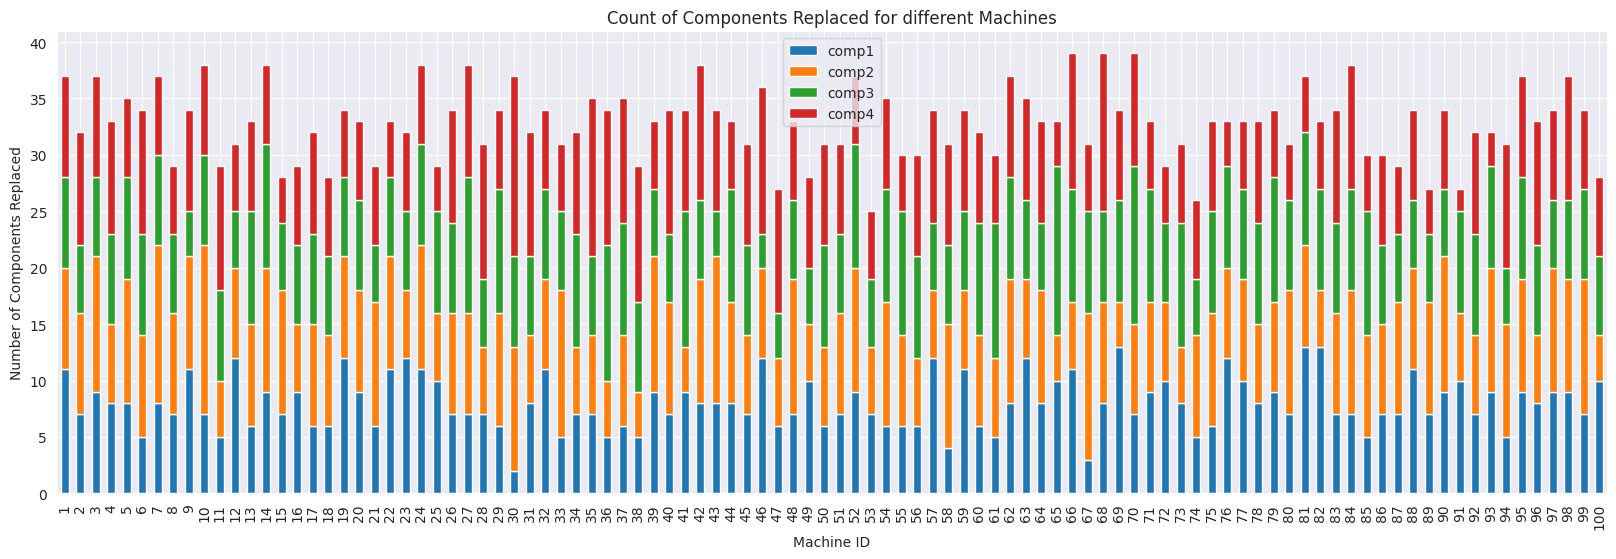

In [ ]:
maintenance= maintenance.groupby(["machineID", "comp"]).size().reset_index()
maintenance.columns = ["machineID", "comp", "num_comp"]
maintenance_pivot = pd.pivot(maintenance, index="machineID", columns="comp", values="num_comp").rename_axis(None, axis=1)

maintenance_pivot.plot.bar(stacked=True, figsize=(20, 6), title="Count of Components Replaced for different Machines")
plt.xlabel("Machine ID")
plt.ylabel("Number of Components Replaced")
plt.show()


### Feature Engineering on the Machines dataset

In [ ]:
# final_features["datetime"] = pd.to_datetime(final_features['datetime'], format='%Y-%m-%d %H:%M:%S')

final_features= telemetry_features.merge(error_count, on=['datetime', 'machineID'], how='left')
final_features = final_features.merge(maintenance_features, on=['datetime', 'machineID'], how='left')
final_features = final_features.merge(machines, on=['machineID'], how='left')

print(final_features.head())
final_features.describe()


             datetime  machineID        volt      rotate    pressure  \
0 2015-01-02 06:00:00          1  197.363125  446.943947  114.342061   
1 2015-01-02 09:00:00          1  147.300678  420.610792  110.408985   
2 2015-01-02 12:00:00          1  185.205355  445.606447  105.993247   
3 2015-01-02 15:00:00          1  180.030715  486.893593   93.743827   
4 2015-01-02 18:00:00          1  165.258225  493.161428  127.014498   

   vibration  year  month  voltmean_3h  voltmax_3h  ...  error2count  \
0  29.527665  2015      1   173.520075  200.872430  ...          NaN   
1  34.203042  2015      1   184.267500  200.872430  ...          NaN   
2  47.862484  2015      1   158.719131  173.394523  ...          NaN   
3  43.099758  2015      1   173.651877  185.205355  ...          NaN   
4  45.135194  2015      1   163.748237  180.030715  ...          NaN   

   error3count  error4count  error5count  hapm_comp1  hapm_comp2  hapm_comp3  \
0          NaN          NaN          NaN       480.0  

,machineID,volt,rotate,pressure,vibration,year,month,voltmean_3h,voltmax_3h,voltmin_3h,...,error1count,error2count,error3count,error4count,error5count,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4,age
count,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000,...,76425.000000,76425.000000,76425.000000,76425.000000,76425.000000,76441.000000,76441.000000,76441.000000,76441.000000,76441.000000
mean,13.624155,170.763292,446.511552,100.866404,40.414194,2015.001020,6.497599,170.781069,188.286789,153.302016,...,0.035342,0.029519,0.025463,0.026483,0.018999,1229.875630,1075.996324,1369.733455,1248.577112,11.362685
std,7.575890,15.475304,52.650470,11.074994,5.394338,0.031928,3.453636,8.194669,10.813330,10.690582,...,0.187410,0.155407,0.140196,0.163049,0.134040,1451.152041,1350.188569,1445.253049,1315.200831,5.642696
min,1.000000,100.194137,160.258190,58.872769,19.728926,2015.000000,1.000000,138.739396,151.168818,97.333604,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,160.307004,412.090983,93.495395,36.782043,2015.000000,3.000000,165.342178,180.779473,146.528162,...,0.000000,0.000000,0.000000,0.000000,0.000000,303.000000,261.000000,336.000000,333.000000,7.000000
50%,14.000000,170.546879,447.741686,100.435269,40.279612,2015.000000,7.000000,170.374480,187.429586,153.533772,...,0.000000,0.000000,0.000000,0.000000,0.000000,756.000000,639.000000,852.000000,813.000000,14.000000
75%,20.000000,180.988673,482.073452,107.503547,43.815830,2015.000000,10.000000,175.606290,194.847035,160.227619,...,0.000000,0.000000,0.000000,0.000000,0.000000,1524.000000,1296.000000,1797.000000,1626.000000,16.000000
max,27.000000,244.518853,670.718478,171.176055,70.530354,2016.000000,12.000000,227.583842,250.870453,215.030066,...,2.000000,2.000000,1.500000,3.000000,2.000000,9189.000000,8157.000000,7629.000000,6837.000000,20.000000


In [ ]:
final_features=final_features.dropna(axis=1)

In [ ]:
final_features.isna().sum()

datetime             0
machineID            0
volt                 0
rotate               0
pressure             0
vibration            0
year                 0
month                0
voltmean_3h          0
voltmax_3h           0
voltmin_3h           0
rotatemean_3h        0
rotatemax_3h         0
rotatemin_3h         0
pressuremean_3h      0
pressuremax_3h       0
pressuremin_3h       0
vibrationmean_3h     0
vibrationmax_3h      0
vibrationmin_3h      0
voltmean_24h         0
voltmax_24h          0
voltmin_24h          0
rotatemean_24h       0
rotatemax_24h        0
rotatemin_24h        0
pressuremean_24h     0
pressuremax_24h      0
pressuremin_24h      0
vibrationmean_24h    0
vibrationmax_24h     0
vibrationmin_24h     0
hapm_comp1           0
hapm_comp2           0
hapm_comp3           0
hapm_comp4           0
model                0
age                  0
dtype: int64

In [ ]:
final_features

,datetime,machineID,volt,rotate,pressure,vibration,year,month,voltmean_3h,voltmax_3h,...,pressuremin_24h,vibrationmean_24h,vibrationmax_24h,vibrationmin_24h,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4,model,age
0,2015-01-02 06:00:00,1,197.363125,446.943947,114.342061,29.527665,2015,1,173.520075,200.872430,...,75.237905,40.385160,52.355876,25.990511,480.0,5160.0,3720.0,4080.0,model3,18
1,2015-01-02 09:00:00,1,147.300678,420.610792,110.408985,34.203042,2015,1,184.267500,200.872430,...,75.237905,39.647643,52.355876,25.990511,483.0,5163.0,3723.0,4083.0,model3,18
2,2015-01-02 12:00:00,1,185.205355,445.606447,105.993247,47.862484,2015,1,158.719131,173.394523,...,78.880780,39.823493,52.355876,25.990511,486.0,5166.0,3726.0,4086.0,model3,18
3,2015-01-02 15:00:00,1,180.030715,486.893593,93.743827,43.099758,2015,1,173.651877,185.205355,...,78.880780,40.230225,52.355876,29.527665,489.0,5169.0,3729.0,4089.0,model3,18
4,2015-01-02 18:00:00,1,165.258225,493.161428,127.014498,45.135194,2015,1,163.748237,180.030715,...,78.880780,39.960667,52.355876,29.527665,492.0,5172.0,3732.0,4092.0,model3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76436,2015-03-30 12:00:00,27,171.124951,321.178224,91.995151,43.871868,2015,3,164.784277,194.747773,...,69.725142,40.135442,49.553076,30.129530,1542.0,102.0,1182.0,822.0,model3,9
76437,2015-03-30 15:00:00,27,175.257383,425.198303,115.904224,39.972432,2015,3,171.117264,194.747773,...,69.725142,40.252466,49.553076,30.129530,1545.0,105.0,1185.0,825.0,model3,9
76438,2015-03-30 18:00:00,27,159.839253,439.669982,86.731256,34.934543,2015,3,170.253499,192.111568,...,69.725142,40.507919,49.553076,30.129530,1548.0,108.0,1188.0,828.0,model3,9
76439,2015-03-30 21:00:00,27,163.727771,440.805991,99.033713,38.486703,2015,3,166.073273,192.111568,...,69.725142,40.874547,49.553076,30.129530,1551.0,111.0,1191.0,831.0,model3,9


# Label Engineering

### Using failures Csv for the labels

In [ ]:
#still working on this
labeled_features = final_features.merge(failures, on=['datetime', 'machineID'], how='left')
labeled_features = labeled_features.fillna(method='bfill', limit=7) # fill backward up to 24h
labeled_features = labeled_features.fillna('none')
labeled_features.head()

,datetime,machineID,volt,rotate,pressure,vibration,year,month,voltmean_3h,voltmax_3h,...,vibrationmean_24h,vibrationmax_24h,vibrationmin_24h,hapm_comp1,hapm_comp2,hapm_comp3,hapm_comp4,model,age,failure
0,2015-01-02 06:00:00,1,197.363125,446.943947,114.342061,29.527665,2015,1,173.520075,200.872430,...,40.385160,52.355876,25.990511,480.0,5160.0,3720.0,4080.0,model3,18,none
1,2015-01-02 09:00:00,1,147.300678,420.610792,110.408985,34.203042,2015,1,184.267500,200.872430,...,39.647643,52.355876,25.990511,483.0,5163.0,3723.0,4083.0,model3,18,none
2,2015-01-02 12:00:00,1,185.205355,445.606447,105.993247,47.862484,2015,1,158.719131,173.394523,...,39.823493,52.355876,25.990511,486.0,5166.0,3726.0,4086.0,model3,18,none
3,2015-01-02 15:00:00,1,180.030715,486.893593,93.743827,43.099758,2015,1,173.651877,185.205355,...,40.230225,52.355876,29.527665,489.0,5169.0,3729.0,4089.0,model3,18,none
4,2015-01-02 18:00:00,1,165.258225,493.161428,127.014498,45.135194,2015,1,163.748237,180.030715,...,39.960667,52.355876,29.527665,492.0,5172.0,3732.0,4092.0,model3,18,none


In [ ]:
labeled_features["failure"].value_counts()

none     74889
comp2      572
comp1      400
comp4      345
comp3      252
Name: failure, dtype: int64

In [ ]:
final_features.reset_index(drop=True, inplace=True)
labeled_features.reset_index(drop=True, inplace=True)

In [ ]:
print(len(final_features), len(labeled_features))

76441 76458


#Modelling the data

## Applying GradientBoost

In [ ]:
# Defining threshold dates for test and training splits
threshold_dates = [
    [pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
    [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
    [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]
]

test_results = []
models = []

for last_train_date, first_test_date in threshold_dates:
    # Split data into training and test sets
    train_data = labeled_features[labeled_features['datetime'] < last_train_date]
    train_y = train_data['failure']
    train_X = pd.get_dummies(train_data.drop(['datetime', 'machineID', 'failure'], axis=1))

    test_data = labeled_features[labeled_features['datetime'] > first_test_date]
    test_X = pd.get_dummies(test_data.drop(['datetime', 'machineID', 'failure'], axis=1))

In [ ]:
# Feature Scalling
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train=sc.fit_transform(train_X)
X_test = sc.fit_transform(test_X)

In [ ]:
# Training the model and making predictions

from sklearn.ensemble import GradientBoostingClassifier

my_model = GradientBoostingClassifier(random_state=42)
my_model.fit(X_train, train_y)

GradientBoostingClassifier(random_state=42)

In [ ]:
test_result = test_data.copy()
test_result['predicted_failure'] = my_model.predict(X_test)
test_results.append(test_result)
models.append(my_model)

## Applying ANN

In [ ]:
# Applying OneHotEncoder for model and failuler for ANN as ANN can not have strings
labeled_features_temp = pd.get_dummies(labeled_features[['model', 'failure', 'datetime', 'machineID']].set_index('datetime')).reset_index()

In [ ]:
labeled_features_temp.head()

,datetime,machineID,model_model1,model_model2,model_model3,model_model4,failure_comp1,failure_comp2,failure_comp3,failure_comp4,failure_none
0,2015-01-02 06:00:00,1,0,0,1,0,0,0,0,0,1
1,2015-01-02 09:00:00,1,0,0,1,0,0,0,0,0,1
2,2015-01-02 12:00:00,1,0,0,1,0,0,0,0,0,1
3,2015-01-02 15:00:00,1,0,0,1,0,0,0,0,0,1
4,2015-01-02 18:00:00,1,0,0,1,0,0,0,0,0,1


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

labeled_features_ann = labeled_features.merge(labeled_features_temp, on=['datetime', 'machineID'], how='left')

# Filling remaining missing values with 'none'
labeled_features_ann.fillna('none', inplace=True)

# Defining threshold dates for test and training splits
threshold_dates = [
    [pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
    [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
    [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]
]

for last_train_date, first_test_date in threshold_dates:
    # Split data into training and test sets
    train_data = labeled_features_ann[labeled_features_ann['datetime'] < last_train_date]
    train_y = train_data['failure']
    train_X = pd.get_dummies(train_data.drop(['datetime', 'machineID', 'failure'], axis=1))

    test_data = labeled_features_ann[(labeled_features_ann['datetime'] > first_test_date) & (labeled_features_ann['datetime'] < first_test_date + pd.DateOffset(days=1))]
    test_X = pd.get_dummies(test_data.drop(['datetime', 'machineID', 'failure'], axis=1))


In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(train_X)
X_test = sc.transform(test_X)

label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(train_y)


In [ ]:
# Training model with ANN
ann = tf.keras.models.Sequential()

In [ ]:
# Build the neural network model
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=12, activation='softmax'))

In [ ]:
# Compile the model
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
ann.fit(X_train, train_y, epochs=5, batch_size=32, validation_split=0.1, verbose=2)

Epoch 1/5
1606/1606 - 5s - loss: 0.0667 - accuracy: 0.9863 - val_loss: 0.0037 - val_accuracy: 0.9991 - 5s/epoch - 3ms/step
Epoch 2/5
1606/1606 - 4s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9993 - 4s/epoch - 2ms/step
Epoch 3/5
1606/1606 - 5s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9993 - 5s/epoch - 3ms/step
Epoch 4/5
1606/1606 - 4s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0022 - val_accuracy: 0.9993 - 4s/epoch - 2ms/step
Epoch 5/5
1606/1606 - 3s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9993 - 3s/epoch - 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Label encode the target variable for testing
test_y_encoded = label_encoder.transform(test_data['failure'])

# Make predictions on the test data using the trained model
predicted_probabilities = ann.predict(X_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Inverse transform label-encoded actual failure labels
actual_labels = label_encoder.inverse_transform(test_y_encoded)

# Convert predicted labels to the same data type as actual labels
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Calculate and display confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)
print('Confusion matrix:\n', cm)

# Calculate accuracy score
accuracy = accuracy_score(actual_labels, predicted_labels)
print('Accuracy Score:', accuracy)


7/7 [==============================] - 0s 2ms/step
Confusion matrix:
 [[  2   0   0]
 [  0  12   0]
 [  0   0 194]]
Accuracy Score: 1.0


#Applying Random Forest

In [ ]:
# Training model with RandomForest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, train_y)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []

    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    print('Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels')
    print(cm)

    # Calculate accuracy score
    accuracy = accuracy_score(actual, predicted)
    output.extend([[accuracy] * len(labels)])
    output_labels.extend(['accuracy'])

    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels

    return output_df

In [ ]:
evaluation_results = []

for i, test_result in enumerate(test_results):
    print('\nSplit %d:' % (i + 1))
    evaluation_result = Evaluate(
        actual=test_result['failure'],
        predicted=test_result['predicted_failure'],
        labels=['none', 'comp1', 'comp2', 'comp3', 'comp4']
    )
    evaluation_results.append(evaluation_result)

evaluation_results[0]


Split 1:
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[18391   174   163    18    17]
 [   61    18     0     0     0]
 [  100     1    49     1     4]
 [   75     0     0     6     7]
 [   51     5     0     0    50]]


,none,comp1,comp2,comp3,comp4
accuracy,0.964723,0.964723,0.964723,0.964723,0.964723


# Applying SMOTE on the Random Forrest

In [ ]:
# Defining threshold dates for test and training splits
threshold_dates = [
    [pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
    [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
    [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]
]

test_results = []
models = []

for last_train_date, first_test_date in threshold_dates:
    # Split data into training and test sets
    train_data = labeled_features[labeled_features['datetime'] < last_train_date]
    train_y = train_data['failure']
    train_X = pd.get_dummies(train_data.drop(['datetime', 'machineID', 'failure'], axis=1))

    test_data = labeled_features[labeled_features['datetime'] > first_test_date]
    test_X = pd.get_dummies(test_data.drop(['datetime', 'machineID', 'failure'], axis=1))

# Feature Scalling
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train=sc.fit_transform(train_X)
X_test = sc.fit_transform(test_X)

from sklearn.linear_model import LogisticRegression
#Initalize the classifier
clf = LogisticRegression(random_state=0)
#Fitting the training data
clf.fit(X_train, train_y)
#Predicting on test
y_pred=clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'failure' is the target variable
label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y)

# Now you can use np.bincount on y_train_encoded
bin_counts = np.bincount(train_y_encoded)


In [ ]:
bin_counts


array([  321,   411,   164,   239, 55924])

In [ ]:
for last_train_date, first_test_date in threshold_dates:
    # Split data into training and test sets
    train_data = labeled_features[labeled_features['datetime'] < last_train_date]
    train_y = train_data['failure']
    train_X = pd.get_dummies(train_data.drop(['datetime', 'machineID', 'failure'], axis=1))

    test_data = labeled_features[labeled_features['datetime'] > first_test_date]
    test_X = pd.get_dummies(test_data.drop(['datetime', 'machineID', 'failure'], axis=1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# ... (previous code)

evaluation_results = []

for last_train_date, first_test_date in threshold_dates:
    # Split data into training and test sets
    train_data = labeled_features[labeled_features['datetime'] < last_train_date]
    train_y = train_data['failure']
    train_X = pd.get_dummies(train_data.drop(['datetime', 'machineID', 'failure'], axis=1))

    test_data = labeled_features[labeled_features['datetime'] > first_test_date]
    test_X = pd.get_dummies(test_data.drop(['datetime', 'machineID', 'failure'], axis=1))

    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(train_X)
    X_test = sc.transform(test_X)

    # Training model with RandomForest
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, train_y)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model
    evaluation_result = Evaluate(
        actual=test_data['failure'],
        predicted=y_pred,
        labels=['none', 'comp1', 'comp2', 'comp3', 'comp4']
    )
    evaluation_results.append(evaluation_result)

# Display results for the first split
print(evaluation_results[0])


Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[31166     6    27     4     2]
 [  110    32     1     0     0]
 [   70     1   154     0     0]
 [  103     0     0    18     0]
 [  155     0     2     0    31]]
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[24857     5    20     1     2]
 [   96    23     0     0     0]
 [   59     2   124     0     0]
 [   79     0     0    16     1]
 [  107     0     1     0    38]]
Confusion matrix
- x-axis is true labels (none, comp1, etc.)
- y-axis is predicted labels
[[18739     8    14     1     1]
 [   54    25     0     0     0]
 [   50     1   104     0     0]
 [   78     0     0     9     1]
 [   68     0     1     0    37]]
              none     comp1     comp2     comp3     comp4
accuracy  0.984913  0.984913  0.984913  0.984913  0.984913
